In [29]:
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [31]:
sns.set_style("whitegrid")
df = pd.read_csv('./datasets/SBI.csv')
df

,Unnamed: 0,id,fever_hours,age,sex,wcc,prevAB,sbi,pct,crp
0,1,57906,24.0,0.79,M,3.8,No,UTI,0.090000,17.700000
1,2,58031,48.0,1.91,F,25.3,Yes,UTI,4.400000,150.400000
2,3,58148,24.0,0.07,F,20.0,No,UTI,0.548136,47.359279
3,4,58169,72.0,0.95,M,6.0,No,UTI,0.310000,4.900000
4,5,58517,1.0,0.11,F,15.6,No,UTI,0.936872,31.394860
...,...,...,...,...,...,...,...,...,...,...
2343,2344,229318,48.0,1.06,M,14.1,No,NotApplicable,0.160000,16.700000
2344,2345,229506,24.0,3.05,M,14.6,No,NotApplicable,1.080000,77.500000
2345,2346,229794,48.0,1.81,M,6.0,No,NotApplicable,0.480000,75.300000
2346,2347,229962,24.0,1.24,M,16.3,Yes,NotApplicable,20.280000,17.300000


In [32]:
df['prevAB'] = LabelEncoder().fit_transform(df['prevAB'])
selection_features = ['wcc', 'age', 'prevAB', 'pct', 'crp']
x = df[selection_features]
y = df['sbi']

In [33]:
x

,wcc,age,prevAB,pct,crp
0,3.8,0.79,0,0.090000,17.700000
1,25.3,1.91,1,4.400000,150.400000
2,20.0,0.07,0,0.548136,47.359279
3,6.0,0.95,0,0.310000,4.900000
4,15.6,0.11,0,0.936872,31.394860
...,...,...,...,...,...
2343,14.1,1.06,0,0.160000,16.700000
2344,14.6,3.05,0,1.080000,77.500000
2345,6.0,1.81,0,0.480000,75.300000
2346,16.3,1.24,1,20.280000,17.300000


In [34]:
y

0                 UTI
1                 UTI
2                 UTI
3                 UTI
4                 UTI
            ...      
2343    NotApplicable
2344    NotApplicable
2345    NotApplicable
2346    NotApplicable
2347    NotApplicable
Name: sbi, Length: 2348, dtype: object

In [35]:
y.unique()

array(['UTI', 'Pneu', 'Bact', 'NotApplicable'], dtype=object)

In [36]:
x.shape, y.shape

((2348, 5), (2348,))

In [37]:
x_data = np.asarray(x).reshape(-1, 5)
y_data = np.asarray(y).reshape(-1, 1)
x_data, y_data

(array([[3.80000000e+00, 7.90000021e-01, 0.00000000e+00, 9.00000000e-02,
         1.77000000e+01],
        [2.53000000e+01, 1.90999997e+00, 1.00000000e+00, 4.40000000e+00,
         1.50400000e+02],
        [2.00000000e+01, 7.00000000e-02, 0.00000000e+00, 5.48135972e-01,
         4.73592787e+01],
        ...,
        [6.00000000e+00, 1.80999994e+00, 0.00000000e+00, 4.80000000e-01,
         7.53000000e+01],
        [1.63000000e+01, 1.24000001e+00, 1.00000000e+00, 2.02800000e+01,
         1.73000000e+01],
        [1.30000000e+01, 3.55999994e+00, 0.00000000e+00, 6.06292932e-01,
         1.81811341e+01]]),
 array([['UTI'],
        ['UTI'],
        ['UTI'],
        ...,
        ['NotApplicable'],
        ['NotApplicable'],
        ['NotApplicable']], dtype=object))

In [59]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [60]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.11, random_state=42)

In [76]:
steps = [
  ('scaling', StandardScaler()),
  ('poly', PolynomialFeatures()),
  ('logistic', LogisticRegression(penalty='l2', multi_class='multinomial'))
]

parameters = {
  'poly_degree': [2,3,4,5,6,7,8]
}

In [77]:
pipe = Pipeline(steps=steps)
print(pipe.get_params().keys())
actualModel = GridSearchCV(pipe, param_grid=parameters, cv=5)
# print(actualModel.get_params())
model = pipe.fit(X_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'poly', 'logistic', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])


c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# model.score(X_val, y_val)

In [79]:
model.score(X_train, y_train)

0.7673056443024494

In [80]:
model.score(X_test, y_test)

0.7276595744680852

In [45]:
predicted_y = model.predict(x_data)
predicted_y

array(['NotApplicable', 'NotApplicable', 'NotApplicable', ...,
       'NotApplicable', 'NotApplicable', 'NotApplicable'], dtype=object)

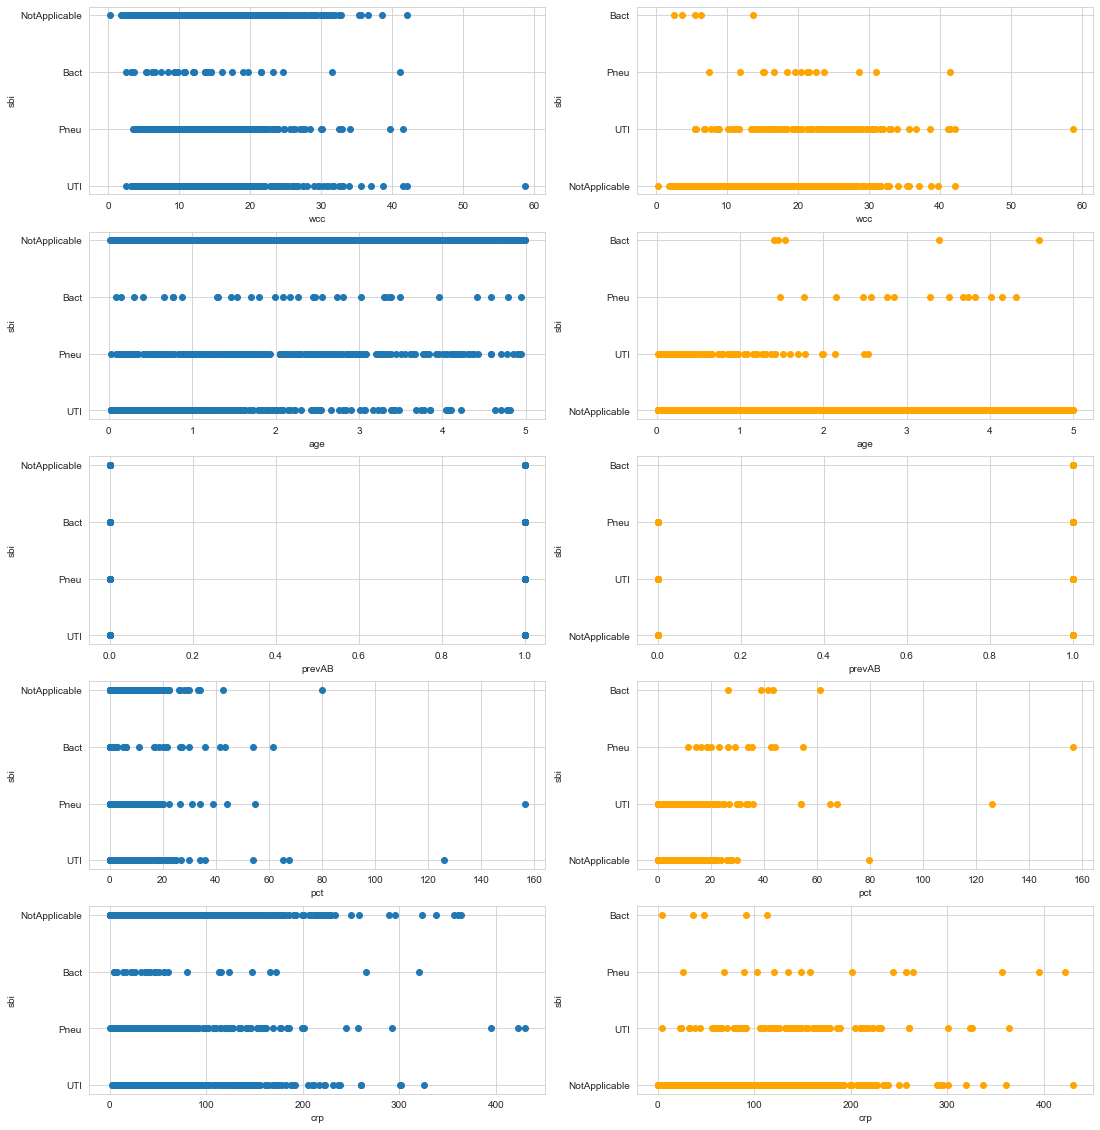

In [46]:
fig, ax = plt.subplots(5, 2)

fig.set_figheight(20)
fig.set_figwidth(18)

j = 0
for i in selection_features:
  ax[j, 0].scatter(df[i], y)
  ax[j, 0].set(xlabel=i, ylabel='sbi')
  ax[j, 1].scatter(df[i], predicted_y, color='orange')
  ax[j, 1].set(xlabel=i, ylabel='sbi')
  j += 1

plt.show()

In [47]:
cf_matrix = confusion_matrix(y_data, predicted_y)
cf_matrix

array([[   4,   24,    1,    5],
       [   0, 1709,    3,   40],
       [   1,  237,    8,    5],
       [   0,  246,    3,   62]], dtype=int64)

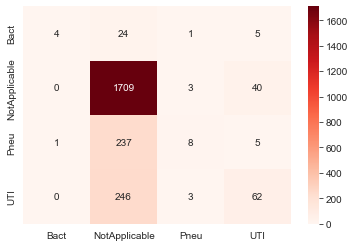

In [48]:
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Reds')
heatmap.xaxis.set_ticklabels(['Bact', 'NotApplicable', 'Pneu', 'UTI'])
heatmap.yaxis.set_ticklabels(['Bact', 'NotApplicable', 'Pneu', 'UTI'])
plt.show()

In [49]:
model.predict([[29,1,0,5,200]])

array(['UTI'], dtype=object)

In [50]:
model.classes_

array(['Bact', 'NotApplicable', 'Pneu', 'UTI'], dtype=object)

In [51]:
precision = precision_score(y, predicted_y, average=None)
precision

array([0.8       , 0.77120939, 0.53333333, 0.55357143])

In [52]:
recall = recall_score(y, predicted_y, average=None)
recall

array([0.11764706, 0.97545662, 0.03187251, 0.19935691])

In [53]:
for i in range(len(recall)):
  f2_score = (5*precision[i]*recall[i])/(2*precision[i]+2*recall[i])
  print(model.classes_[i], f2_score)

Bact 0.2564102564102564
NotApplicable 1.0767389112903225
Pneu 0.07518796992481203
UTI 0.36643026004728135
